<a href="https://colab.research.google.com/github/IvanBaroni/projects-in-data/blob/main/CausalImpact_in_R_Ivan_Baroni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# CausalImpact Colab Template in R**
```
    - Version: 1.5 - last update: 2025-Apr
```

> ###### This R-colab template aims to empower anyone to run Causal Impact on their own without the need for in-depth coding knowledge.

##### *Notes:*
######    • Only time series by DAY can be used for now.
######    • Each step requires the previous step to have run before.

```
    - by Ivan Baroni
```

##- - - - - 1. Load CSV file

**Import CSV flie:**

 1. Click on FILE icon in the left bar (folder icon).
 2. Click on the first icon - "Upload to session storage".
 3. Locate the CSV file in your computer.

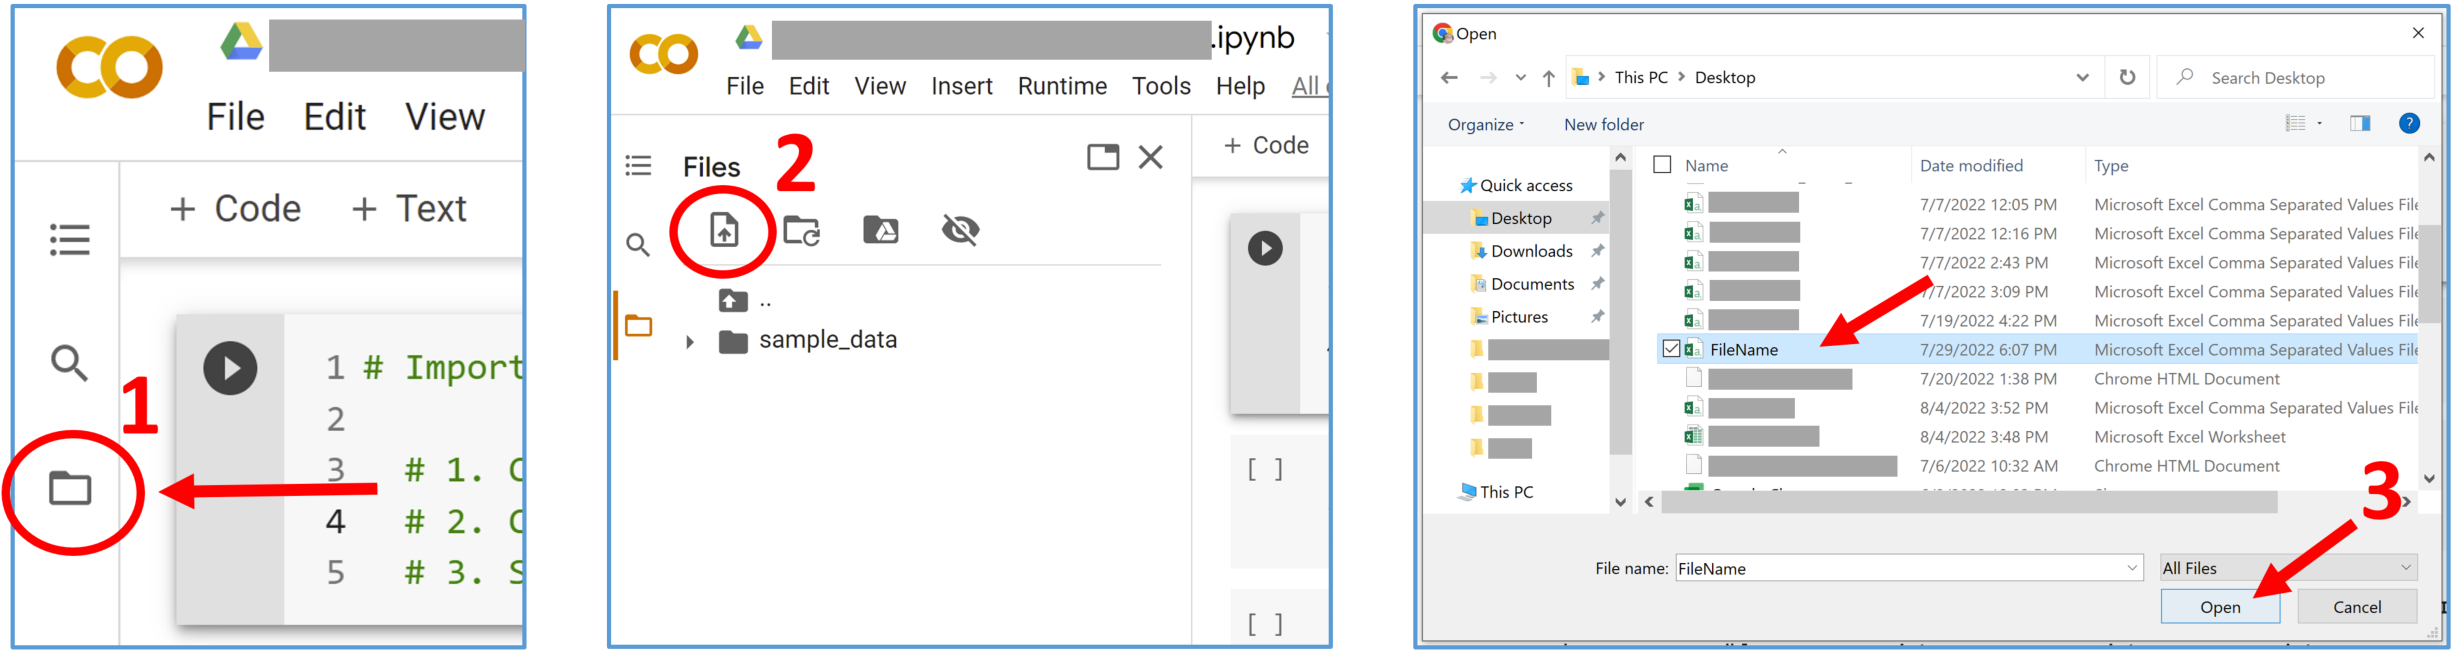

In [ ]:
#@title Write the uploaded file name: (Start Here!) { vertical-output: true, display-mode: "form" }
 #@markdown Don't delete the single quotes and don't use ".csv" in the name

red_text <- "\033[31m"
green_text <- "\033[32m"
orange_text <- "\033[38;5;172m"
bold_text <- "\033[1m"
reset_text <- "\033[0m"



CSVFileName <- "CausalImpact_DummyData" #@param {type:"string"};/


# Attribute your CSV file to a dataframe
df <- read.csv(paste(CSVFileName,".csv",sep=""), header = T, sep = ',')


cat(bold_text, "\n• These are the first 4 rows from your dataset",reset_text)
head(df, 4)


result <- tryCatch({


# Install packages
 system("apt install r-cran-causalimpact")

# Load packages
suppressMessages(library(CausalImpact))
suppressMessages(suppressWarnings(library(lubridate)))





###############################################
###########   Dataset Tests   #################
###############################################
# Your code that might produce an error



cat(bold_text,"\n• Checking dataset integrity \n", reset_text)

# Function to check if a string is in "yyyy-mm-dd" format
is_valid_date_format <- function(date_string) {
  # Define a regular expression pattern for "yyyy-mm-dd" format
  date_pattern <- "^[0-9]{4}-[0-9]{2}-[0-9]{2}$"

  # Use grepl to check if the string matches the pattern
  grepl(date_pattern, date_string)
}

# Check if the first column of the dataset contains only valid date formats
if (all(sapply(df[, 1], is_valid_date_format))) {
  cat(green_text, "  ✔ All dates are in 'yyyy-mm-dd' format. \n", reset_text, sep="")
    end_code = FALSE
} else {
  cat(red_text,"  ✘ ERROR: The first column must contain DATES only and in 'yyyy-mm-dd' format. Fix this and upload the data file again.\n", reset_text, sep="")
  end_code = TRUE
}

first_date <- as.Date(min(df[,1]))
last_date <- as.Date(max(df[,1]))

if (end_code == FALSE) {
cat(green_text,"   ✔ First date: ", as.character(first_date), ", Last Date: ", as.character(last_date), ". \n", reset_text, sep="")
cat(green_text,"   ✔ Total days: ", last_date-first_date+1, ", Unique dates: ", length(unique(df[,1])), ". \n", reset_text, sep="")

# Check if the first column of the dataset contains only valid date formats
if ( length(unique(df[,1])) == last_date-first_date+1 ) {
             cat(green_text, "   ✔ Values for every date whithin date range. \n", reset_text, sep="")
} else {
             cat(red_text, "   ✘ ERROR: Some dates are missing. \n", reset_text, sep="")
}

if ( length(unique(df[,1])) != length(df[,1]) ) {
             cat(red_text, "   ✘ ERROR: Some dates may be duplicated (dataset has ", length(df[,1]) ," rows). \n",  reset_text, sep="")
}

# Function to check if a column contains only numeric values
is_numeric_column <- function(column) {
  all(is.numeric(column))
}

# Check each column starting from the second column
column_names <- names(df)[-1]  # Exclude the first column
non_numeric_columns <- character(0)

for (col_name in column_names) {
  if (!is_numeric_column(df[[col_name]])) {
    non_numeric_columns <- c(non_numeric_columns, col_name)
  }
}

if (length(non_numeric_columns) == 0) {
  cat(green_text, "   ✔ Every column contains only numeric values.\n", reset_text, sep="")
} else {
  cat(red_text,"   ✘ ERROR: Some columns do not contain numeric values only: ", paste(non_numeric_columns, collapse = ", "), "\n", reset_text, sep="")
}

# Check if there are any missing values in the dataframe
missing_columns <- colnames(df)[apply(is.na(df), 2, any)]

if (length(missing_columns) == 0) {
  cat(green_text, "   ✔ There are no missing values in any column.\n", reset_text , sep="")
} else {
  cat(orange_text, "   ⚠ WARNING: Some columns have missing values: ", paste(missing_columns, collapse = ", "), "\n", reset_text, sep="")
}}

# Check if there are periods in the column names
if (any(grepl("\\.", colnames(df)))) {
  cat(orange_text,"  ⚠ WARNING: Some column names might have special characters and were modified, check the list below.\n", reset_text)
} else {
}



###############################################
###########   List of columns   ###############
###############################################


cat(bold_text,"\n• ",CSVFileName," dataset has ", length(colnames(df)), " columns: \n", reset_text, sep="")


# Initialize an empty vector to store lines
lines <- c()

# Set the number of items per line
items_per_line <- 10

# Create lines with items separated by commas
for (i in seq(1, length(colnames(df)), by = items_per_line)) {
  items <- colnames(df)[i:min(i + items_per_line - 1, length(colnames(df)))]
  line <- paste(items, collapse = ", ")
  lines <- c(lines, line)
}

# Print the lines
cat(lines, sep = ",\n")


}, error = function(e) {
  cat(red_text, "✘ ERROR:", conditionMessage(e),
   "\n Check the file name (case sensitive), make sure it is a .CSV file and that it contains no special characters.", reset_text)

})


 
• These are the first 4 rows from your dataset 

,Date,SalesTarget,CompetitorA,CompetitorB,CompetitorC,CompetitorD,CompetitorE
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,2024-01-01,22522,13267,20367,6789,30723,10672
2,2024-01-02,22045,14218,19478,6917,30263,10631
3,2024-01-03,21263,13305,19304,9664,30998,10991
4,2024-01-04,22629,13702,17317,7039,30347,10261


 
• Checking dataset integrity 
   ✔ All dates are in 'yyyy-mm-dd' format. 
   ✔ First date: 2024-01-01, Last Date: 2024-12-31. 
   ✔ Total days: 366, Unique dates: 366. 
   ✔ Values for every date whithin date range. 
   ✔ Every column contains only numeric values.
   ✔ There are no missing values in any column.

• CausalImpact_DummyData dataset has 7 columns: 
Date, SalesTarget, CompetitorA, CompetitorB, CompetitorC, CompetitorD, CompetitorE


##- - - - -   2. Model Input

In [ ]:
#@title Date settings { vertical-output: true, display-mode: "form" }

if (!exists("CSVFileName")) {
  cat("\033[31m", "✘ ERROR: You need to write the CSV file name in the previsous block and run it first.\n", "\033[0m")
} else {
  cat("\033[32m", "✔ Reading from ", bold_text, CSVFileName, reset_text, "\033[32m", " dataset. \n", "\033[0m", sep="")
}


 #@markdown Select range of days that will be used to train the model:
pre_period_start <- "2024-02-01" # @param {type:"date"}
pre_period_end <- "2024-04-30" # @param {type:"date"}


 #@markdown  Select range of days that will be used to evaluate the lift:
post_period_start <- "2024-05-01" # @param {type:"date"}
post_period_end <- "2024-05-31" # @param {type:"date"}

pre.period <- as.Date(c(pre_period_start, pre_period_end))
post.period <- as.Date(c(post_period_start,post_period_end))

first_date <- as.Date(min(df[,1]))
last_date <- as.Date(max(df[,1]))

pre_dayscount <- as.numeric(difftime(pre_period_end, pre_period_start, units = "days"))
post_dayscount <- as.numeric(difftime(post_period_end, post_period_start, units = "days"))


#@markdown Insert the target series you'll investigate for impact (don't erase the quotes. Name should match the column name in original CSV file):
Target <- 'SalesTarget' #@param {type:"string"};

#@markdown Insert Peer Set Series (separeted by comma. Names should match the columns name in original CSV file):
Counterfactual_Series <- 'CompetitorA, CompetitorB, CompetitorC, CompetitorD, CompetitorE' #@param <list>

listParam <-  as.list(strsplit(gsub(" ", "", Counterfactual_Series, fixed = TRUE), ",")[[1]])



# Print date interval and peer set series
cat(bold_text, "\n• Pre Period date range", reset_text,
    "\n    ", as.character(pre_period_start), ", ", pre_period_end," (", pre_dayscount," days)", sep="");

cat(bold_text, "\n\n• Post Period date range", reset_text,
    "\n    ", as.character(post_period_start), ", ", post_period_end," (", post_dayscount," days)", sep="");

cat(bold_text, "\n\n• Target Series", reset_text, "\n    ", as.character(Target), "\n" )
cat( bold_text, "\n•", length(listParam),"Peer Set Series", reset_text)
for (i in 1:length(listParam)) {
  cat("\n     ",i, ". ", listParam[[i]], sep="")
}



#################################################
####  Test for dates out of the file range  #####
#################################################

# Set of imputed dates
dateParam <- c(pre_period_start, pre_period_end, post_period_start, post_period_end)

# Initialize an empty vector to store dateParam outside the interval
dateParam_outside_interval <- vector("character")

# Check if any date in the list is outside the interval
for (date in dateParam) {

  if (date < first_date || date > last_date) {
    dateParam_outside_interval <- c(dateParam_outside_interval, date)

  }
}

# Check if there are any dateParam outside the interval and print the appropriate message
if (length(dateParam_outside_interval) > 0) {
  cat("\033[31m",
      "\n✘ ERROR! \n \n The following date is outside the date interval:\n",
      dateParam_outside_interval,
      "\n \n Your uploaded file has dates between:\n", as.character(first_date), ",", as.character(last_date),
      "\n \n Please change that date and run this block again.",
       "\033[0m")

}



✔ Reading from CausalImpact_DummyData dataset. 

• Pre Period date range
    2024-02-01, 2024-04-30 (89 days)

• Post Period date range
    2024-05-01, 2024-05-31 (30 days) 

• Target Series  
     SalesTarget 
 
• 5 Peer Set Series 
     1. CompetitorA
     2. CompetitorB
     3. CompetitorC
     4. CompetitorD
     5. CompetitorE

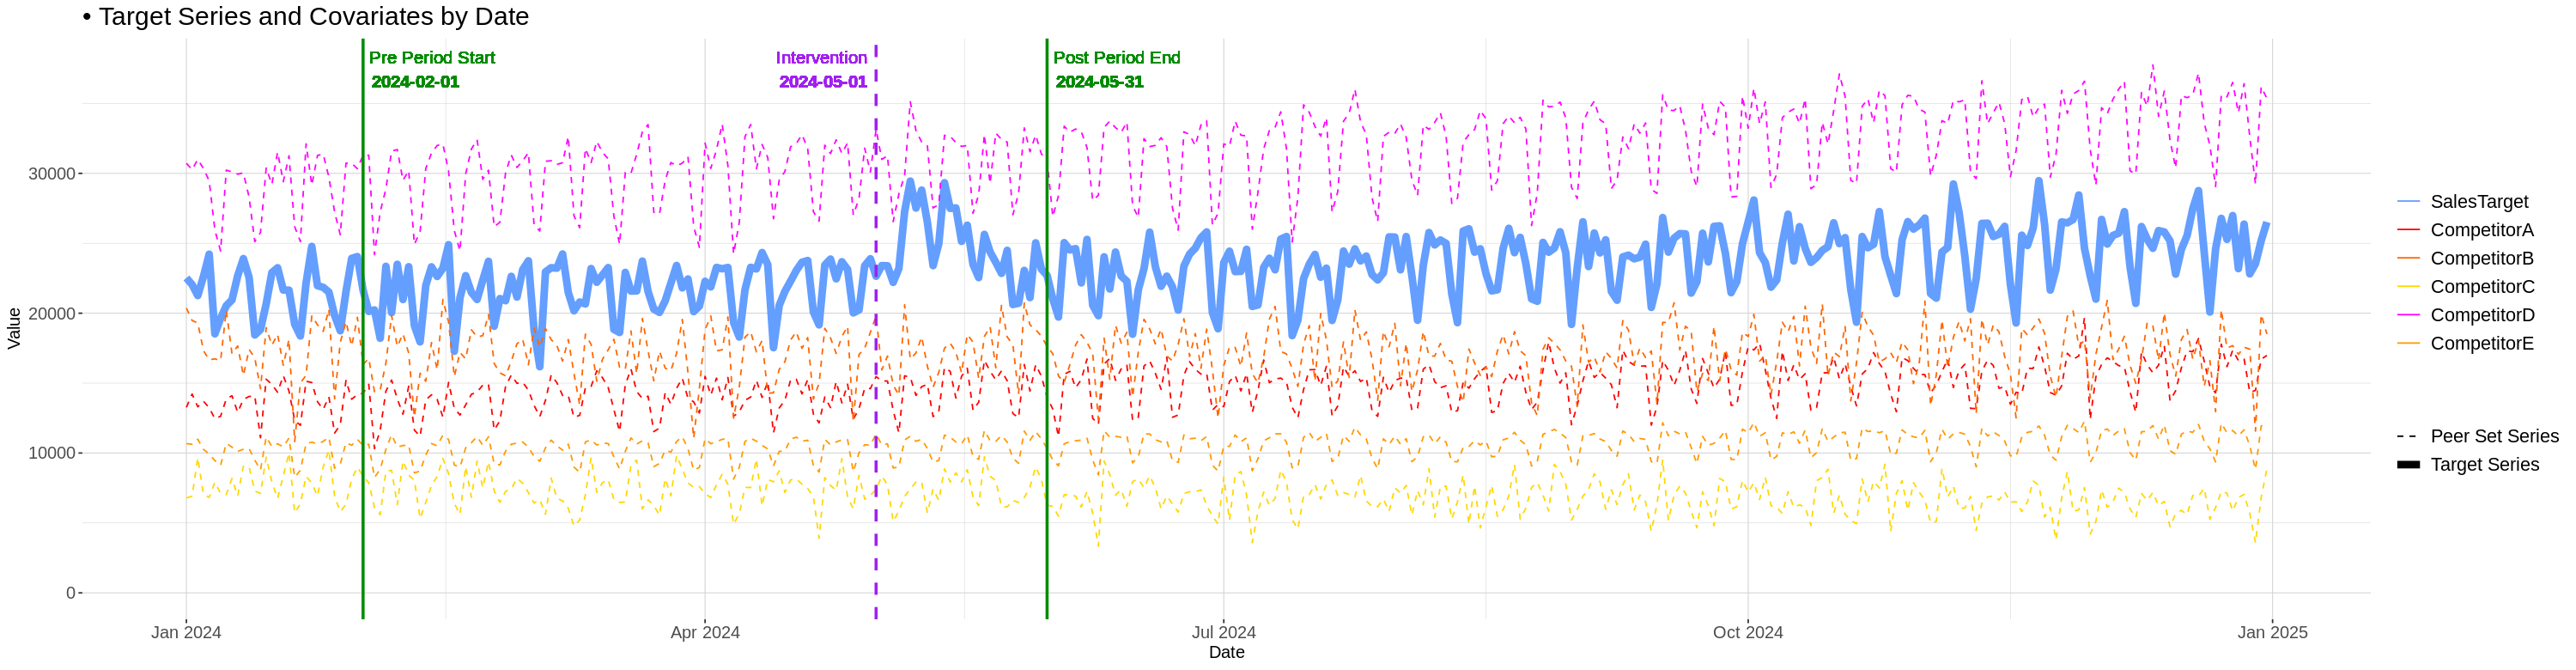

In [ ]:
#@title [Optional] Plot chart { vertical-output: true, display-mode: "form" }

 #@markdown [Optional] Change the chart width
plot_width <- 25 # @param {type:"number"}

 #@markdown [Optional] Change between absolute and indexed values
series_values = 'Original' #@param ["Original", "Indexed"]



# Create df2 only with matters (for plot pourpose)
names(df)[1]  <- "DATE"
df$DATE <- ymd(df$DATE)

suppressMessages(suppressWarnings(library(dplyr)))

df2 <- df %>%
  select(DATE, all_of(Target))

for(i in 1:length(listParam)) {
  df2[ , ncol(df2) + 1] <- as.ts(df[listParam[[i]]])
  colnames(df2)[ncol(df2)] <- listParam[[i]]
}



#Plot size
options(repr.plot.width = plot_width, repr.plot.height = 6.5)


# Index Values
if (series_values == "Indexed")
{
# Loop through each column starting from the second column and index by the maximum value
for (i in 2:ncol(df2)) {
  max_val <- max(df2[[i]], na.rm = TRUE)
  df2[[i]] <- df2[[i]] / max_val}
Chart_Title <- "• Target Series and Covariates by Date (indexed)"
} else {
Chart_Title <- "• Target Series and Covariates by Date"
}




#Create color palette
N <- length(listParam)+1

warm_colors <- c("#FF0000", "#FF6600", "#FFD700", "#FF00FF", "#FF9900",
                  "#FF33FF", "#FFB300", "#FF0033", "#FF9900", "#FF3399")

color_palette <- c("#649eff", rep(warm_colors, length.out = N))

my_custom_palette <- color_palette[1:N]


# Load the ggplot2 package
 library(ggplot2)

names(df2)[1]  <- "DATE"
df2$DATE <- ymd(df2$DATE)



# Plot all columns automatically and labelling vertical lines

#Convert from wide to long format
suppressMessages(suppressWarnings(library(data.table)))
suppressMessages(suppressWarnings( d <- melt(setDT(df2), id.vars = "DATE") )) #This will always be DATE and cannot be changed

# define vertical line dates
 vertical_date1 <- as.Date(pre_period_start)
 vertical_date2 <- as.Date(post_period_start)
 vertical_date3 <- as.Date(post_period_end)


#Plot graph with vertical lines
suppressMessages(suppressWarnings(
ggplot(d, aes(DATE, value, col = variable,
              linewidth = ifelse(variable == unique(variable)[1], "Target Series", "Peer Set Series"),
              linetype = ifelse(variable == unique(variable)[1], "Target Series", "Peer Set Series"))) +
  geom_line() +

 # Customize the size and linetype scales
  scale_linewidth_manual(values = c("Target Series" = 2.5, "Peer Set Series" = 0.5)) +
  scale_linetype_manual(values = c("Target Series" = "solid", "Peer Set Series" = "dashed")) +

      geom_vline(xintercept = vertical_date1, color = "green4", linewidth = 1, linetype = "solid") +
        geom_text(aes(vertical_date1,0 , label = "Pre Period Start", hjust = -0.05, vjust=-44, fontface = 1), size=4.3, color = "green4")+
        geom_text(aes(vertical_date1,0 , label = pre_period_start , hjust = -0.1, vjust=-42, fontface = 2), size=4.3, color = "green4")+
     geom_vline(xintercept = vertical_date2, color = "purple", linewidth = 1, linetype = "dashed") +
            geom_text(aes(vertical_date2,0 , label = 'Intervention', hjust = 1.1, vjust=-44, fontface = 1), size=4.3, color = "purple")+
            geom_text(aes(vertical_date2,0 , label = post_period_start, hjust = 1.1, vjust=-42, fontface = 2), size=4.3, color = "purple")+
     geom_vline(xintercept = vertical_date3, color = "green4", linewidth = 1, linetype = "solid") +
            geom_text(aes(vertical_date3,0 , label = 'Post Period End', hjust = -0.05, vjust=-44, fontface = 1), size=4.3, color = "green4")+
            geom_text(aes(vertical_date3,0 , label = post_period_end, hjust = -0.1, vjust=-42, fontface = 2), size=4.3, color = "green4")+



  theme(
    title = element_text(size = 15),
    legend.key.size = unit(0.7, "cm"),
    legend.text = element_text(size = 13),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 12),
    panel.background = element_rect(fill = "white"),
    panel.grid = element_line(size=0.3, color = "lightgrey"),
    legend.title = element_text(size = 0),
    legend.key = element_rect(fill = "white"),
    legend.spacing = unit(2, "lines"),
  ) +


 scale_color_manual(values = my_custom_palette) +


labs(title = Chart_Title,
       x = "Date",
       y = "Value",
      color = "Series")
))

Posterior inference {CausalImpact}

                         Average          Cumulative      
Actual                   24579            761953          
Prediction (s.d.)        21926 (246)      679691 (7636)   
95% CI                   [21444, 22415]   [664758, 694879]
                                                          
Absolute effect (s.d.)   2654 (246)       82262 (7636)    
95% CI                   [2164, 3135]     [67074, 97195]  
                                                          
Relative effect (s.d.)   12% (1.3%)       12% (1.3%)      
95% CI                   [9.7%, 15%]      [9.7%, 15%]     

Posterior tail-area probability p:   2e-04
Posterior prob. of a causal effect:  99.97998%

• Target: SalesTarget. Run the next cell to read a report with all the details.



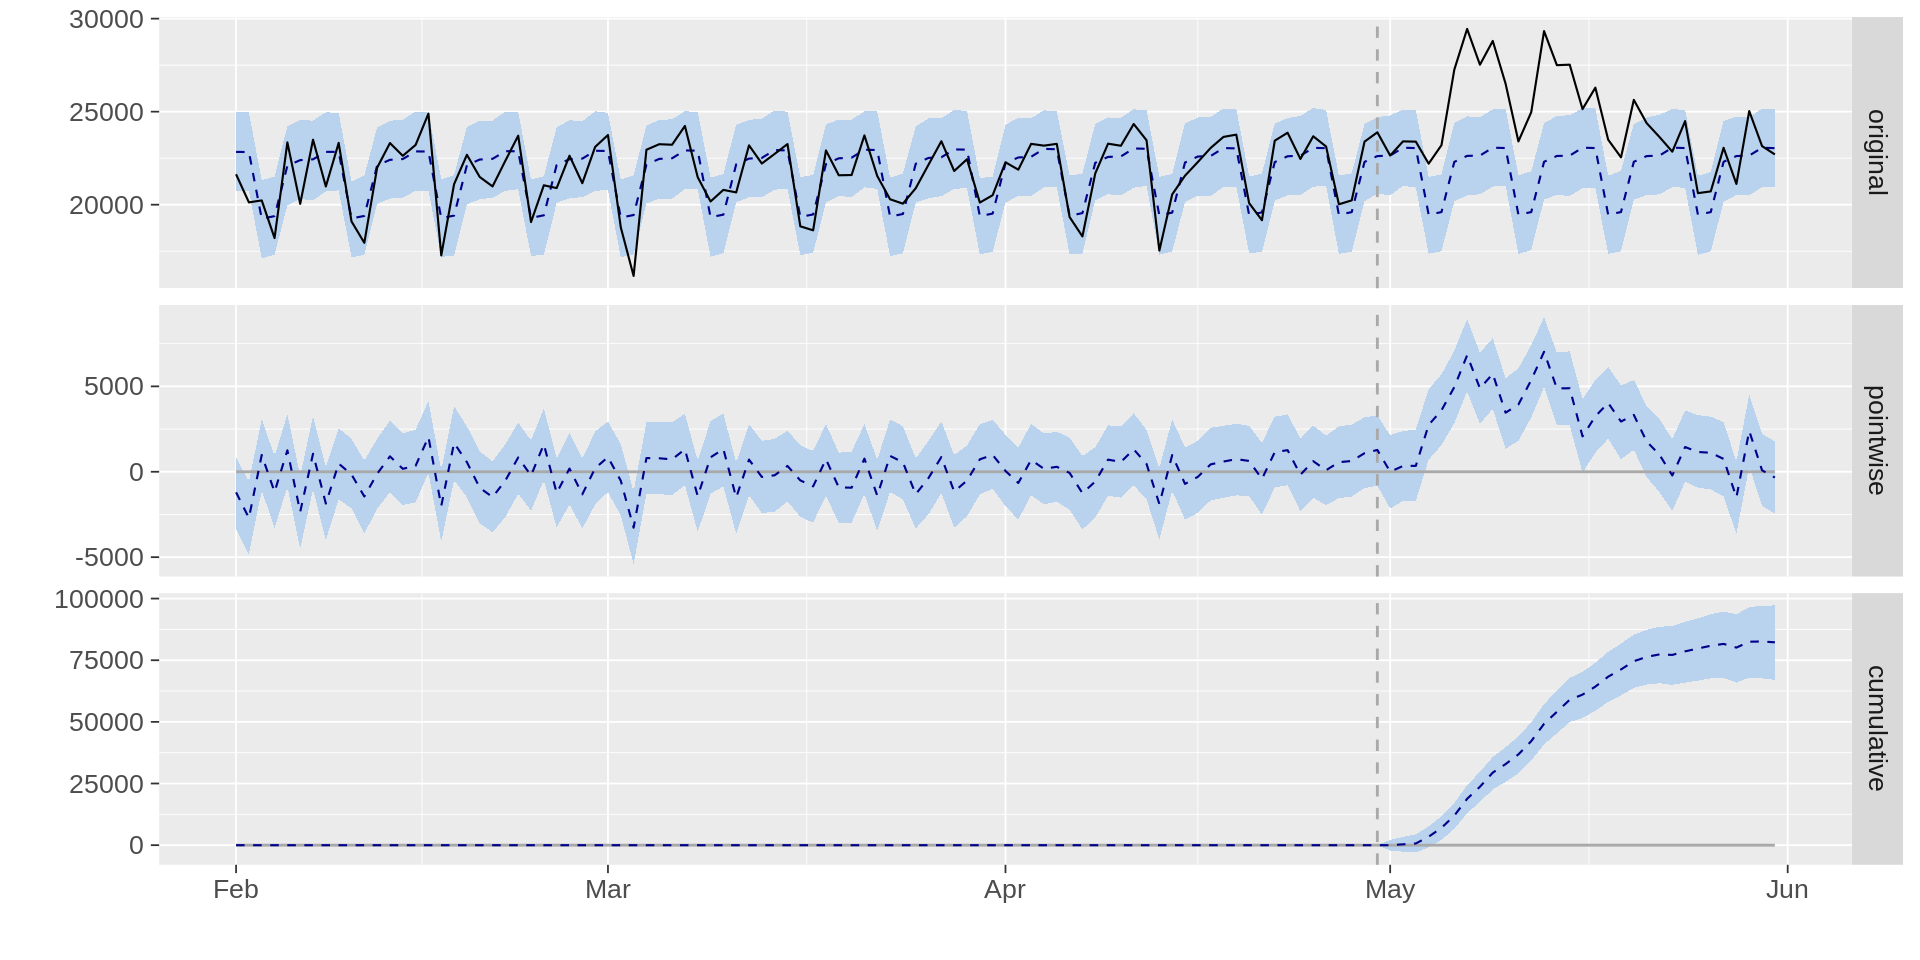

In [ ]:
#@title Run Causal Impact { vertical-output: true, display-mode: "form" }

 #@markdown [Optional] Decide which chart element to show
Chart_Elements = 'Original + Pointwise + Cumulative' #@param ["Original + Pointwise + Cumulative", "Original + Cumulative", "Original Only", "Cumulative Only" ]

 #@markdown [Optional] Change the theme of the chart
Chart_Theme = 'Gray' #@param ["Default", "Minimal", "Classic", "Void", "Light", "Gray", "Dark"]


##########################
####    Data Prep     ####
##########################


# Change if the date column is not the number 1 from data frame
names(df)[1]  <- "DATE"

# Transform DATE from "Fator" to "Date"
   # Note: we use ymd() function because head(df) revealed that YMD is the date format in our df
df$DATE <- ymd(df$DATE)

# Cut df to contains only the used time window. This makes a better plot at the end
df_start <- which(grepl(pre_period_start,  df$DATE))
df_end <- which(grepl(post_period_end,  df$DATE))
df_cut <- df[  df_start:df_end, ]


###################################################
####    Setting Target and Peer Set series     ####
###################################################

# Define the Target Series
y <- as.ts( df_cut[[Target]] )

# Define the Control Series
df_final <- data.frame(y) #create dataframe

#Add control ts to the dataframe
for(i in 1:length(listParam)) {                                   # Head of for-loop
  df_final[ , ncol(df_final) + 1] <- as.ts(df_cut[listParam[[i]]])                  # Append new column
  colnames(df_final)[ncol(df_final)] <- listParam[[i]]  # Rename column name to actual ts name
}


# Add a time column for df_final
time.points <- seq.Date(as.Date(pre_period_start), by = 1, length.out = nrow(df_final))
df_final <- zoo(cbind(df_final), time.points)


##################################
####     Run CausalImpact     ####
##################################

# To guarantee that every repetition will have the exact same output
set.seed(42)

impact <- CausalImpact(df_final,
                       pre.period,
                       post.period,
                       model.args = list(niter = 5000, nseasons = 7))
# Notes:
# "niter" is 1000 by default. Higher values generally makes more consistent predictions, but the model takes longer to run.
# "nseason" is 1 by default and it is used when there is no apparent seasonality behavior. When using days, nseasons =7 is usually more appropriate.



##################################
####     Plotting Results     ####
##################################

 # Load the ggplot2 package
 library(ggplot2)


# Elements selection
if (Chart_Elements == 'Original + Pointwise + Cumulative') {
  chartOption <- c("original", "pointwise", "cumulative" )
  options(repr.plot.width=16, repr.plot.height=8)

} else if (Chart_Elements == 'Original + Cumulative') {
  chartOption <- c("original", "cumulative" )
  options(repr.plot.width=16, repr.plot.height=6.5)

} else if (Chart_Elements == 'Original Only') {
  chartOption <- c("original" )
  options(repr.plot.width=16, repr.plot.height=5)

} else {
  chartOption <- c("cumulative" )
  options(repr.plot.width=16, repr.plot.height=5)
}


# Themes
switch(Chart_Theme,
    "Default" = impact.plot <- plot(impact, chartOption) + theme_bw(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Minimal" = impact.plot <- plot(impact, chartOption) + theme_minimal(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Classic" = impact.plot <- plot(impact, chartOption) + theme_classic(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Void"    = impact.plot <- plot(impact, chartOption) + theme_void(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Light"   = impact.plot <- plot(impact, chartOption) + theme_light(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Gray"    = impact.plot <- plot(impact, chartOption) + theme_grey(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 ),
    "Dark"    = impact.plot <- plot(impact, chartOption) + theme_dark(base_size = 20,  base_line_size=0.5, base_rect_size=0.8 )
)


plot(impact.plot)



# Show summary
summary_text <- capture.output(summary(impact))
summary_text <- head(summary_text, -2)  # Remove the last sentence
# Print the summary without the end sentence
cat(summary_text, sep = "\n")
cat("• Target: ", bold_text, Target, reset_text, ". Run the next cell to read a report with all the details.\n\n", sep="")


In [ ]:
#@title [Optional] Show Full Report { vertical-output: true, display-mode: "form" }

# Capture the summary report as a character string
text <- capture.output(summary(impact, "report"))

break_text_at_length <- function(text, max_length = 85) {
  lines <- unlist(strsplit(text, "\n"))
  broken_lines <- character(0)

  for (line in lines) {
    words <- unlist(strsplit(line, " "))
    current_line <- ""

    for (word in words) {
      if (nchar(current_line) + nchar(word) + 1 <= max_length) {
        if (current_line != "") {
          current_line <- paste(current_line, word, sep = " ")
        } else {
          current_line <- word
        }
      } else {
        broken_lines <- c(broken_lines, current_line)
        current_line <- word
      }
    }

    if (current_line != "") {
      broken_lines <- c(broken_lines, current_line)
    }

    # Add an additional line break after each original line break
    broken_lines <- c(broken_lines, "")
  }

  return(broken_lines)
}


broken_lines <- break_text_at_length(text, max_length = 85)

# Print broken lines
cat(broken_lines, sep = "\n")


Analysis report {CausalImpact}

During the post-intervention period, the response variable had an average value of
approx. 24.58K. By contrast, in the absence of an intervention, we would have
expected an average response of 21.93K. The 95% interval of this counterfactual
prediction is [21.44K, 22.42K]. Subtracting this prediction from the observed
response yields an estimate of the causal effect the intervention had on the response
variable. This effect is 2.65K with a 95% interval of [2.16K, 3.14K]. For a
discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can
only sometimes be meaningfully interpreted), the response variable had an overall
value of 761.95K. By contrast, had the intervention not taken place, we would have
expected a sum of 679.69K. The 95% interval of this prediction is [664.76K, 694.88K].

The above results are given in terms of absolute numbers. In relative terms, the
response v

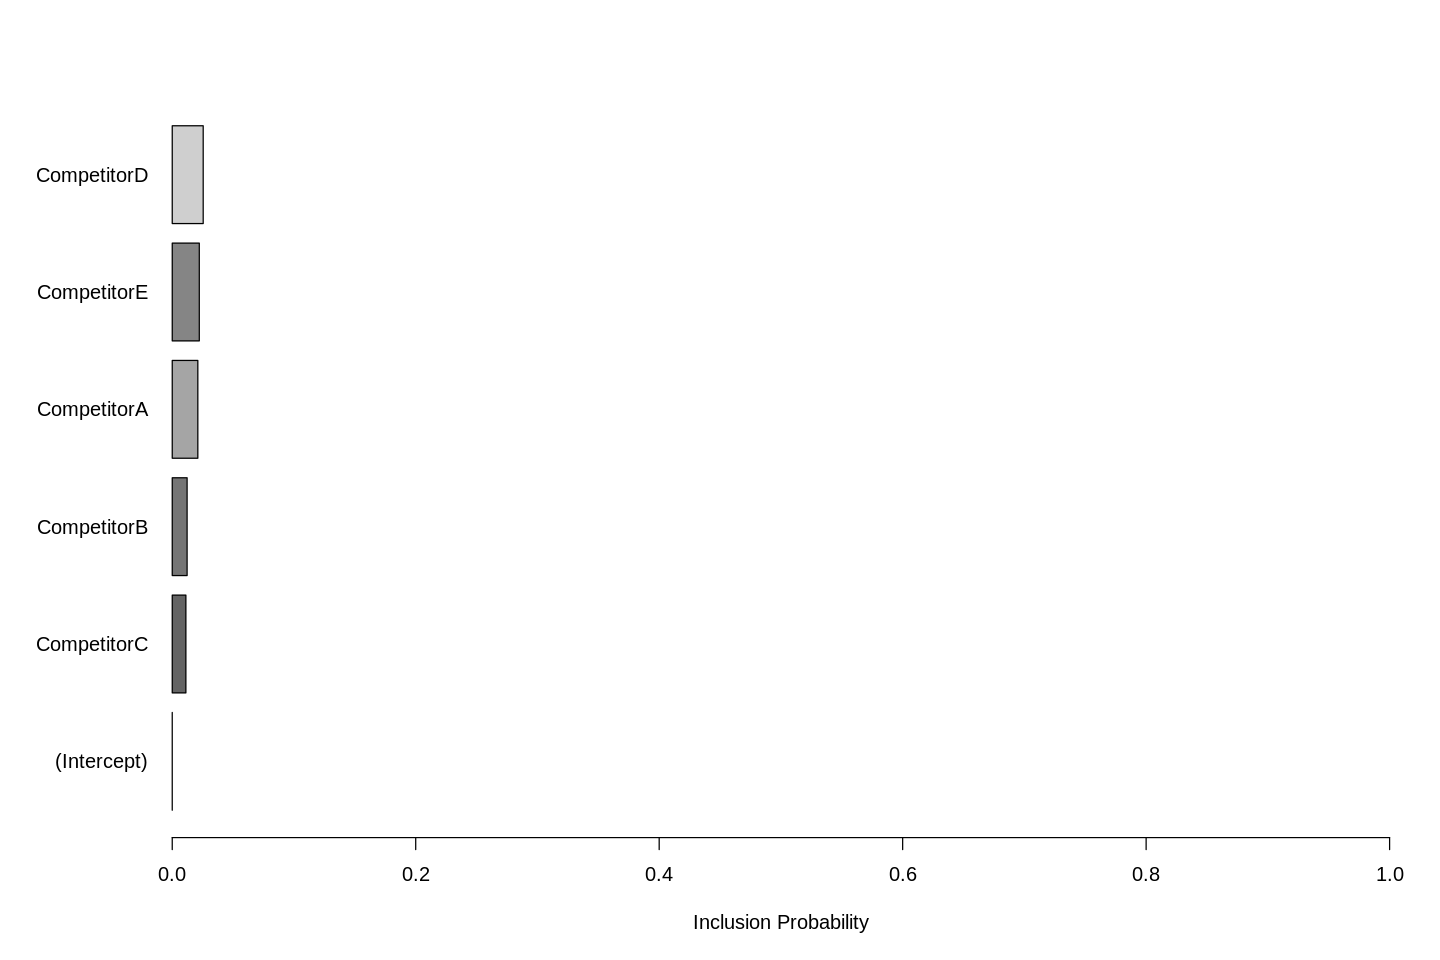

In [ ]:
#@title [Optional] Plot the influence of every peer set series on the model { vertical-output: true, display-mode: "form" }

options(repr.plot.width = 12, repr.plot.height = 8)

# Plot the influence of every peer set series on the model
plot(impact$model$bsts.model, "coefficients")


In [ ]:
#@title [Optional] Export to CSV every series the model created { vertical-output: true, display-mode: "form" }
# Export to CSV every series the model created
outputSeries <- impact[["series"]]
write.csv(outputSeries, file = "Outputs_Causal_Impact.csv", row.names=F)
cat( "Outputs_Causal_Impact.csv can be downloaded in File folder" )


Outputs_Causal_Impact.csv can be downloaded in File folder

# [Optional] Peer Set Analysis to Validate Results
 - *Special thanks to the Causal Impact EMEA group for putting together some of the resources used in this session.*

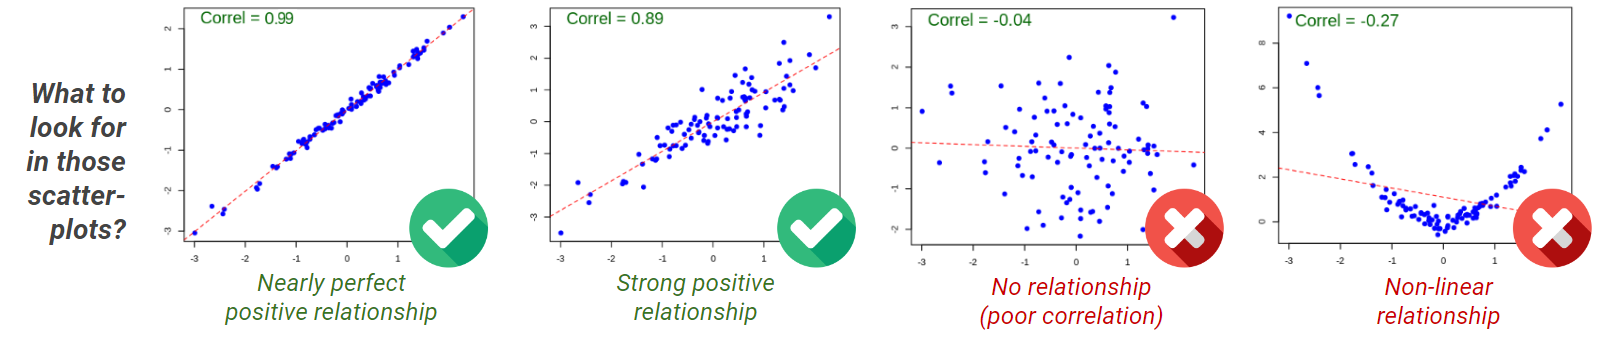


It is important for a good peer set series to be correlated with the target series. The following cell will plot scatterplots and give the correlation for each pair Target/PeerSet, but only taking into account the period before the intervention.

**Success here is having a high correlation** (nearest as possible to 1) and having the dots in the scatterplot near the red dashed line (regressor model).





 • Peer Set: CompetitorA  
   Correl = 0.646    (Medium Correlation) ✔

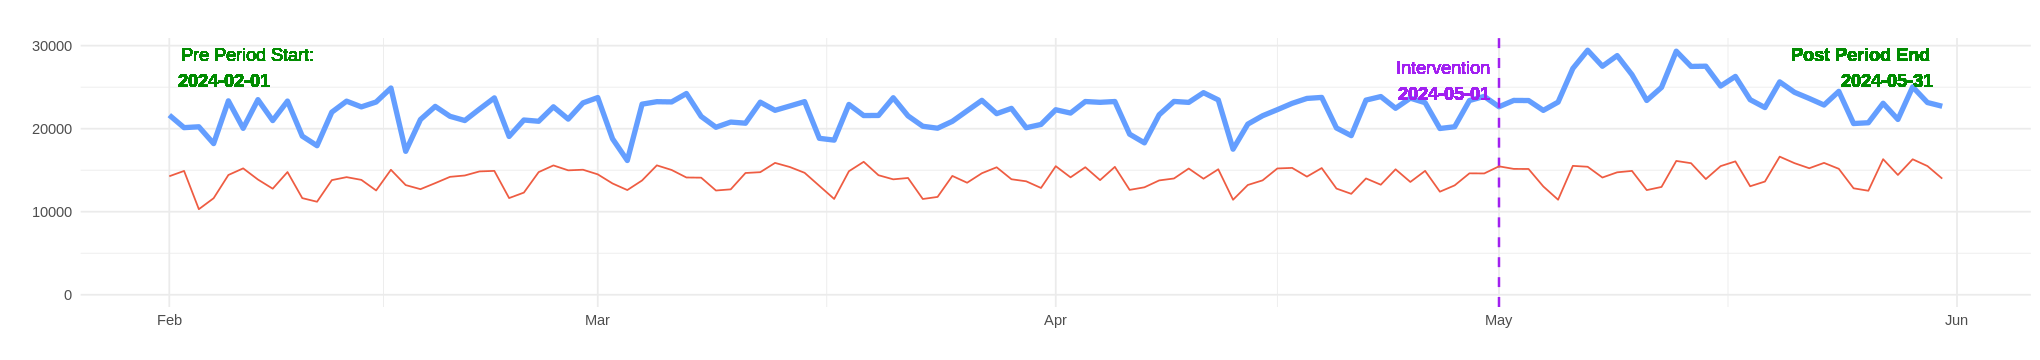



 • Peer Set: CompetitorB  
   Correl = 0.471    (Medium Correlation) ✔

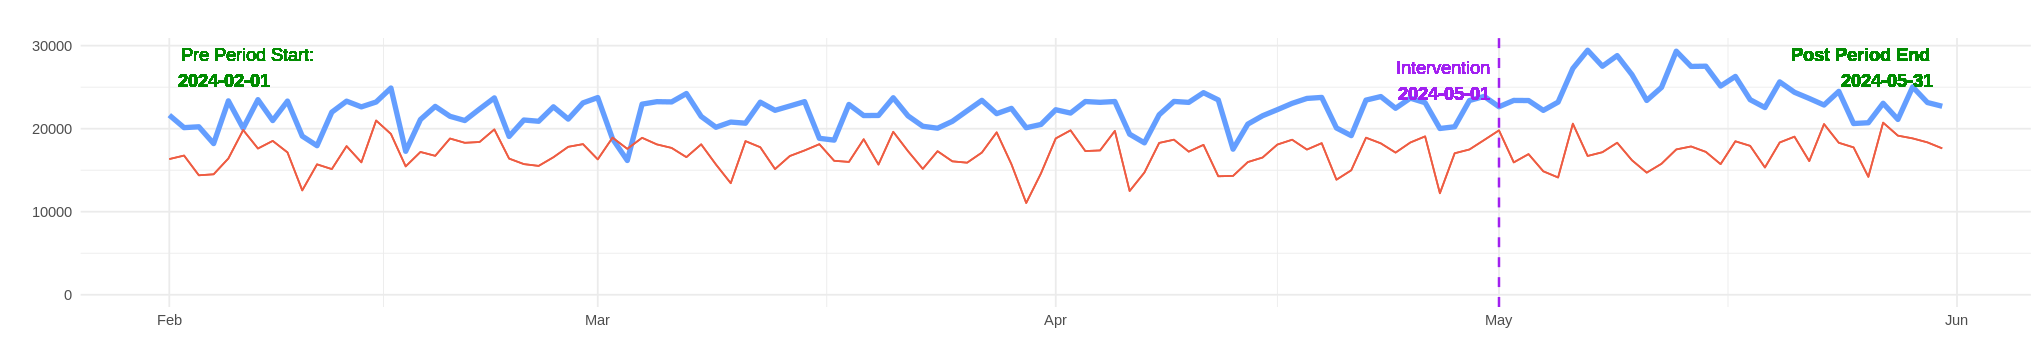



 • Peer Set: CompetitorC  
   Correl = 0.391    (Low Correlation) ✘

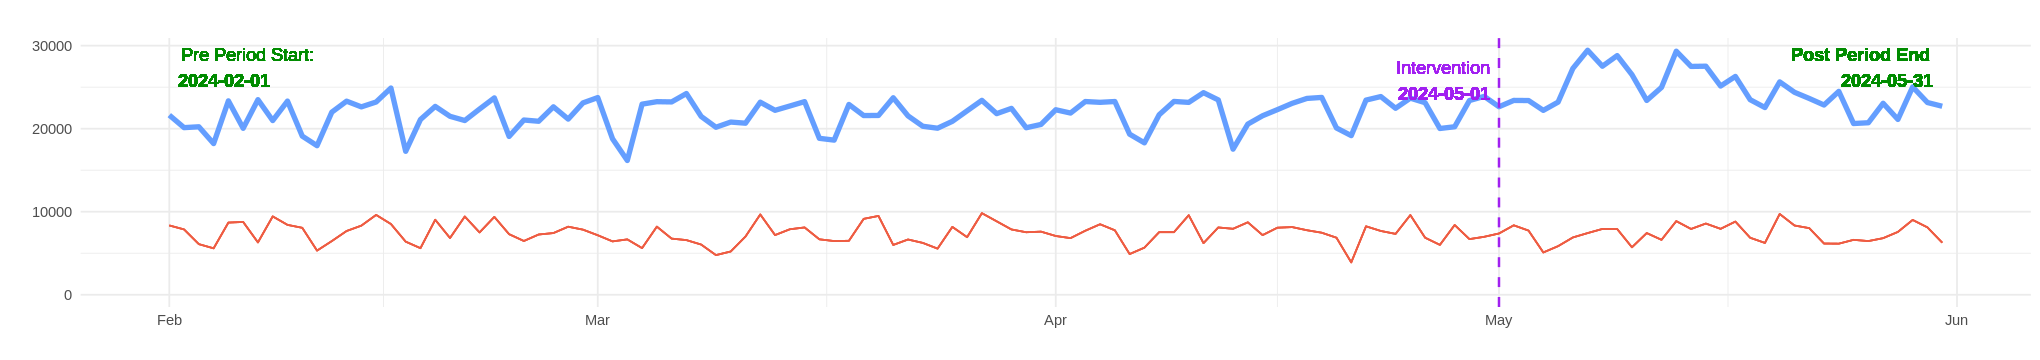



 • Peer Set: CompetitorD  
   Correl = 0.737    (High Correlation) ✔ 

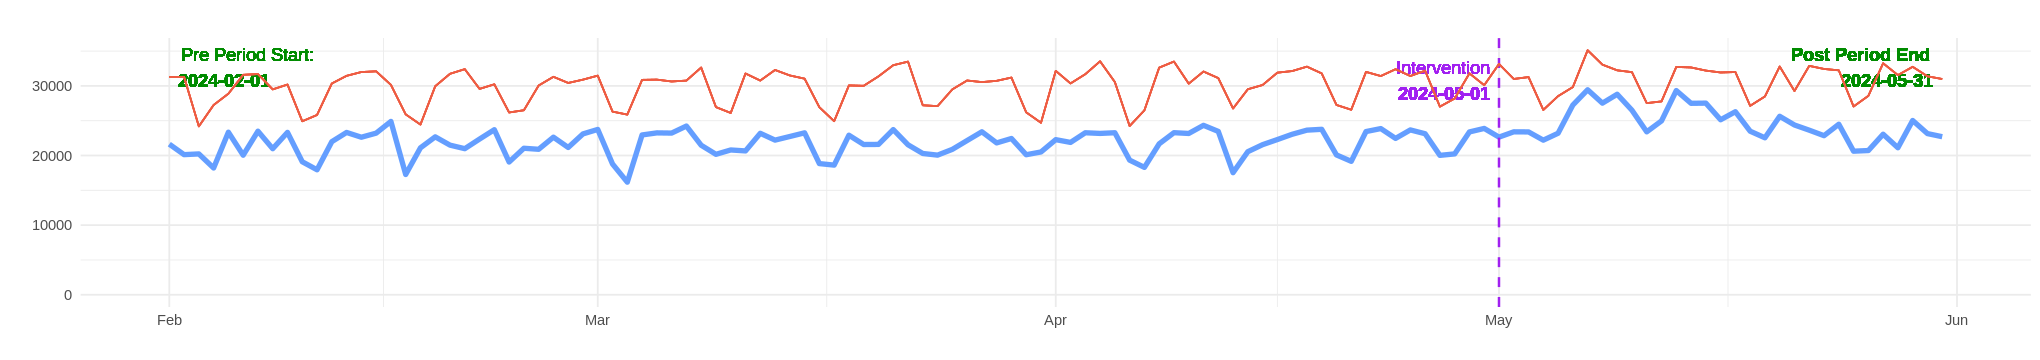



 • Peer Set: CompetitorE  
   Correl = 0.722    (High Correlation) ✔ 

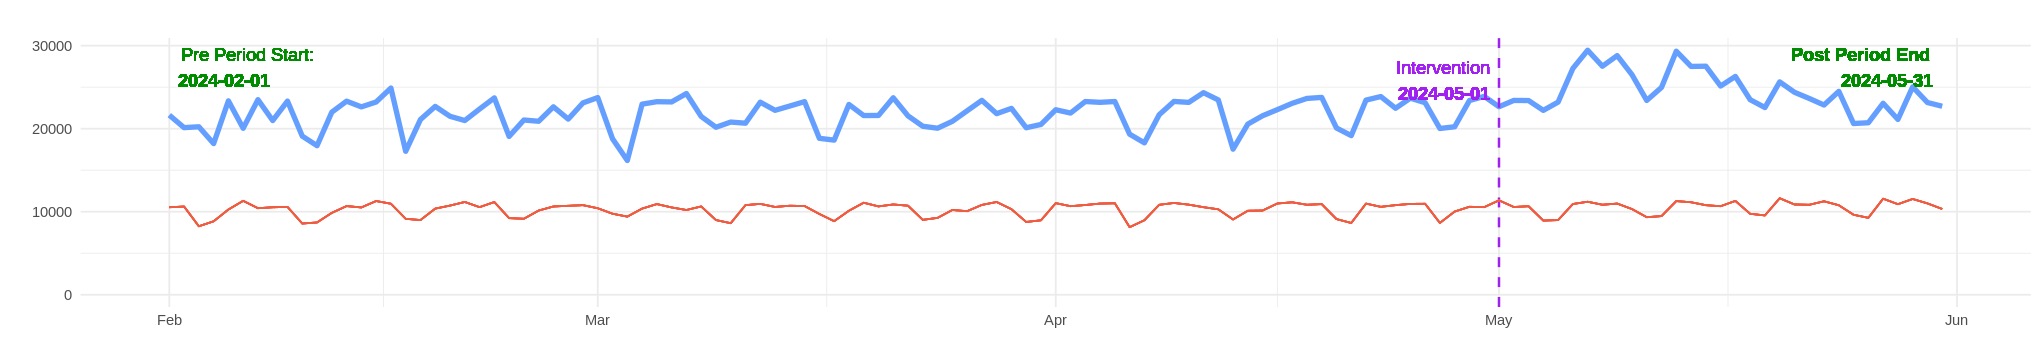

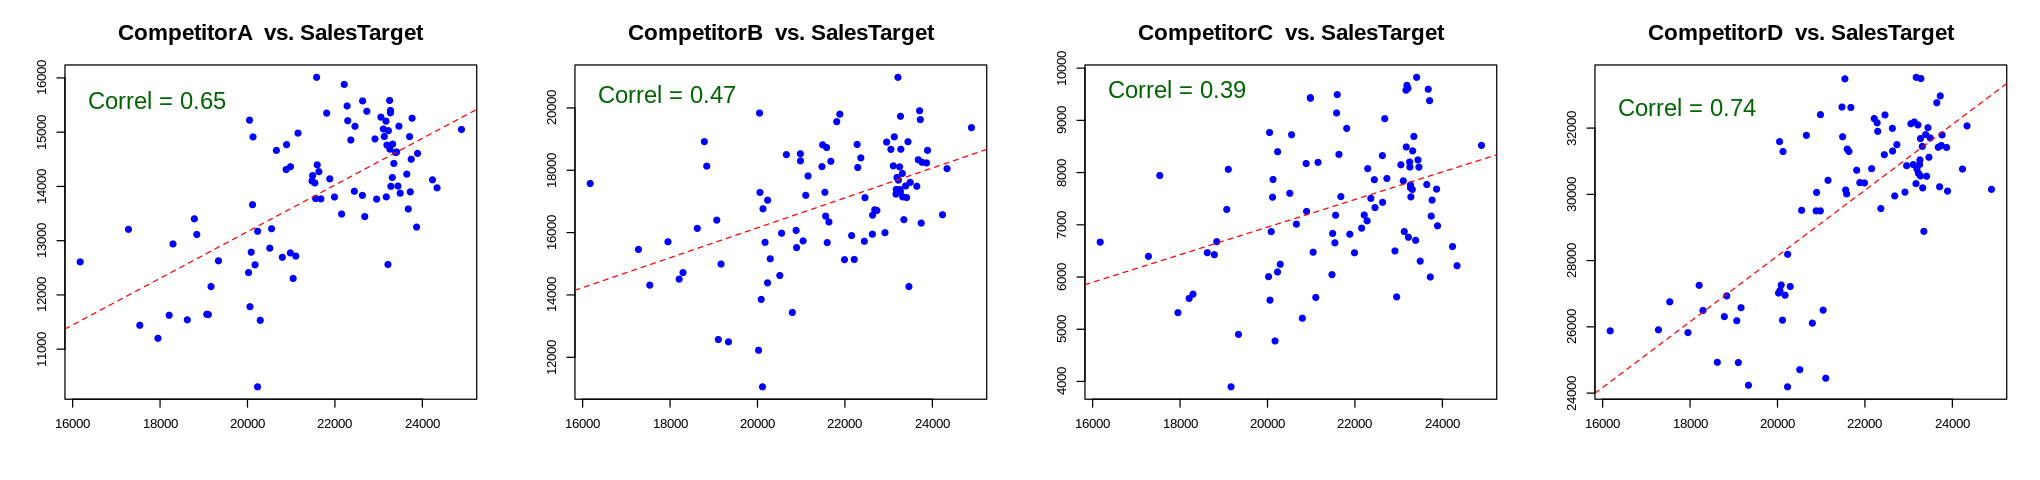

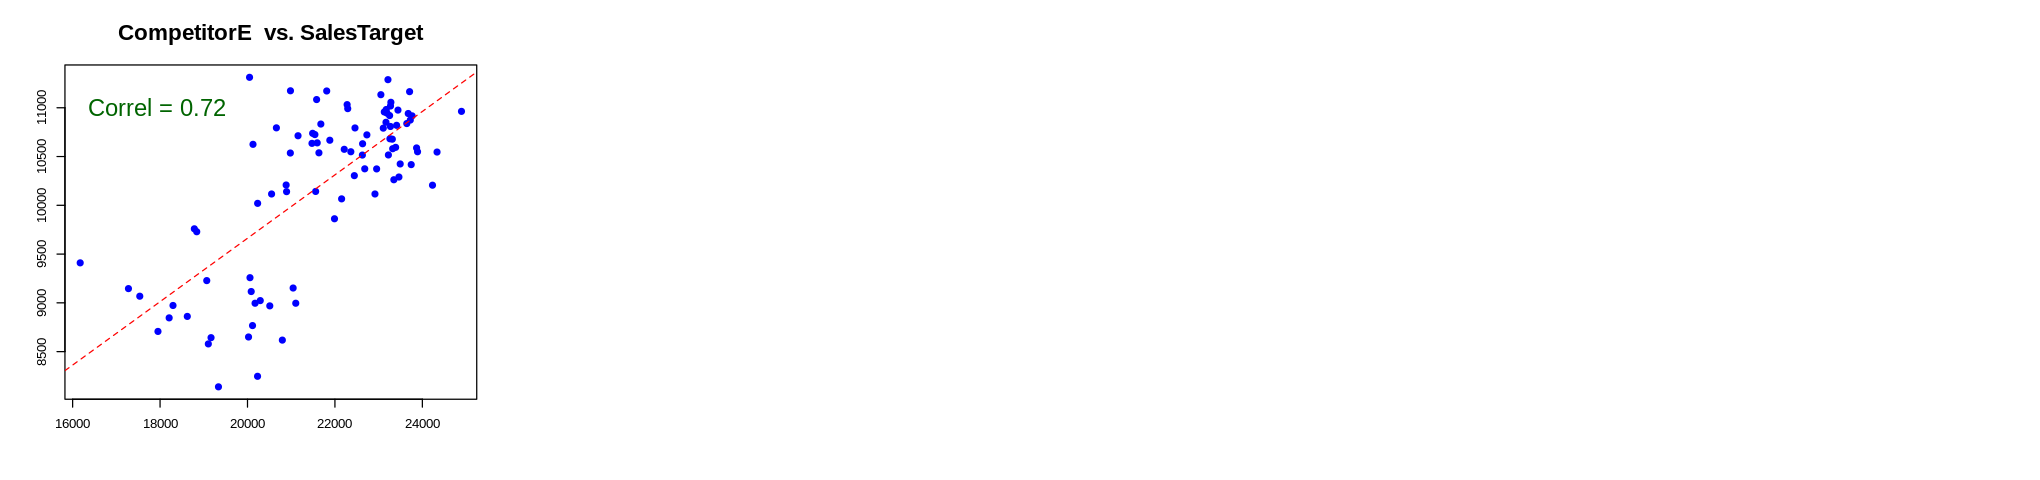

In [ ]:

#@title Plot Scatterplots { vertical-output: true, display-mode: "form" }

#@markdown [Optional] Show details by ploting the target with every covariate?
Output_plot = 'Scatterplot + Details' #@param ["Scatterplot only", "Scatterplot + Details"]

#@markdown [Optional] Change between absolute and indexed values for the detailed view
Series_values = 'Original' #@param ["Original", "Indexed"]

options(warn = -1)

##############################################
############ Aditional dataframes ############
##############################################

# Create df3 for plotting porpouse
suppressMessages(suppressWarnings(library(dplyr)))
df3 <- df %>%
  select(DATE, all_of(Target))

for(i in 1:length(listParam)) {
  df3[ , ncol(df3) + 1] <- as.ts(df[listParam[[i]]])
  colnames(df3)[ncol(df3)] <- listParam[[i]]
}
df_start <- which(grepl(pre_period_start,  df$DATE))
df_end <- which(grepl(post_period_end,  df$DATE))
df3 <- df3[  df_start:df_end, ]



# For indexed values
if (Series_values == "Indexed")
{
# Loop through each column starting from the second column and index by the maximum value
for (i in 2:ncol(df3)) {
  max_val <- max(df3[[i]], na.rm = TRUE)
  df3[[i]] <- df3[[i]] / max_val}
}




# Create df_corr for correl porpouse
df_corr <- df %>%
  select(DATE, all_of(Target))

for(i in 1:length(listParam)) {
  df_corr[ , ncol(df_corr) + 1] <- as.ts(df[listParam[[i]]])
  colnames(df_corr)[ncol(df_corr)] <- listParam[[i]]
}
df_start <- which(grepl(pre_period_start,  df$DATE))
df_end <- which(grepl(pre_period_end,  df$DATE))
df_corr <- df_corr[  df_start:df_end, ]

##############################################
############  Series Details Plot ############
##############################################


if (Output_plot == 'Scatterplot + Details') {


options(repr.plot.width=17, repr.plot.height=3)


 # Load the ggplot2 package
 library(ggplot2)


p1 <- ggplot()

  Date <- seq(as.Date(pre_period_start), as.Date(post_period_end), by = "days",)

  vertical_date1 <- as.Date(pre_period_start)
  vertical_date2 <- as.Date(post_period_start)
  vertical_date3 <- as.Date(post_period_end)

 # Create a line plot using ggplot2 for all series in df
p1 = ggplot(df3, aes(x = Date)) +
   geom_line(aes(y = df3[,2]), color = "#649eff", linewidth = 1.5) +


        geom_text(aes(vertical_date1,0 , label = "Pre Period Start:", hjust = -0.09, vjust=-18, fontface = 1), color = "green4")+
        geom_text(aes(vertical_date1,0 , label = pre_period_start , hjust = -0.1, vjust=-16, fontface = 2), color = "green4")+
     geom_vline(xintercept = vertical_date2, color = "purple", linewidth = 0.7, linetype = "dashed") +
        geom_text(aes(vertical_date2,0 , label = 'Intervention', hjust = 1.1, vjust=-17, fontface = 1), color = "purple")+
        geom_text(aes(vertical_date2,0 , label = post_period_start, hjust = 1.1, vjust=-15, fontface = 2), color = "purple")+
        geom_text(aes(vertical_date3,0 , label = 'Post Period End', hjust = 1.09, vjust=-18, fontface = 2), color = "green4")+
        geom_text(aes(vertical_date3,0 , label = post_period_end, hjust = 1.1, vjust=-16, fontface = 2), color = "green4")+
   labs(title = "",
        x = "",
        y = "") +
        theme_minimal()


peerChart <- p1

c <- 2

# Loop
for (i in 1:length(listParam)) {

    c = c + 1

   correlation <- round(cor(df_corr[,2], df_corr[,c]),3)


if (correlation >= 0 && correlation <= 0.4) {
     corr_class  <- "(Low Correlation) ✘"
} else if (correlation > 0.4 && correlation <= 0.7) {
     corr_class  <- "(Medium Correlation) ✔"
} else if (correlation > 0.7 && correlation <= 1) {
     corr_class  <- "(High Correlation) ✔ "
} else {
     corr_class  <- "(Correlation is negative) ✘"
}

   peerChart <-  peerChart + geom_line(aes(y = df3[,c]), color = "tomato2")

   print(peerChart)
   cat("\n\n\033[1m • Peer Set:", paste(listParam[i]), "\033[0m \n   Correl =", correlation, "  ", corr_class )
}

}


##############################################
############  Plot Scatterplots   ############
##############################################


options(repr.plot.width=17, repr.plot.height=4)

# Create a scatterplot
par(mfrow = c(1, 4))  # Set up a single row of plots

for (i in 1:length(listParam)) {
  plot(df_corr[,2], df_corr[,i+2],
       main = paste(colnames(df_corr[i+2]), " vs.", colnames(df_corr[2])),
       cex.main = 1.7,
       xlab = "",
       ylab = "",
       col = "blue",
       pch = 19 )

correlation_value <- cor(df_corr[,2], df_corr[,i+2])


model <- lm(df_corr[,i+2] ~ df_corr[,2])
abline(model, col = "red", lty = 2)

text(
  x = min(df_corr[,2]),
  y = max(df_corr[,2+i]) - max(df_corr[,2+i])*0.03,
  labels = paste("Correl =", round(correlation_value, 2)),
  pos = 4,
  cex = 1.8,
  col = 'darkgreen'
)
}

##- - - - - 2. Predictability and Stability test

Causal Impact should not be able to identify an effect in the period prior to intervention for your response series. The next cell will re-ran the Causal Impact using the prior days before the intervention to test for impactful changes.

**Success for this test is not having a statistically significant impact.**



• NEW Pre Period date range
    2024-02-01, 2024-04-23 (82 days)

• NEW Post Period date range
    2024-04-24, 2024-05-01 (7 days) 

• Target Series  
     SalesTarget 
 
• 5 Peer Set Series 
     1. CompetitorA
     2. CompetitorB
     3. CompetitorC
     4. CompetitorD
     5. CompetitorE


Posterior inference {CausalImpact}

                         Average          Cumulative      
Actual                   22430            179443          
Prediction (s.d.)        21835 (402)      174683 (3219)   
95% CI                   [21040, 22633]   [168322, 181064]
                                                          
Absolute effect (s.d.)   595 (402)        4760 (3219)     
95% CI                   [-203, 1390]     [-1621, 11121]  
                                                          
Relative effect (s.d.)   2.7% (1.9%)      2.7% (1.9%)     
95% CI                   [-0.9%, 6.6%]    [-0.9%, 6.6%]   

Posterior tail-area probability p:   0.075
Posterior prob. of a causal effect:

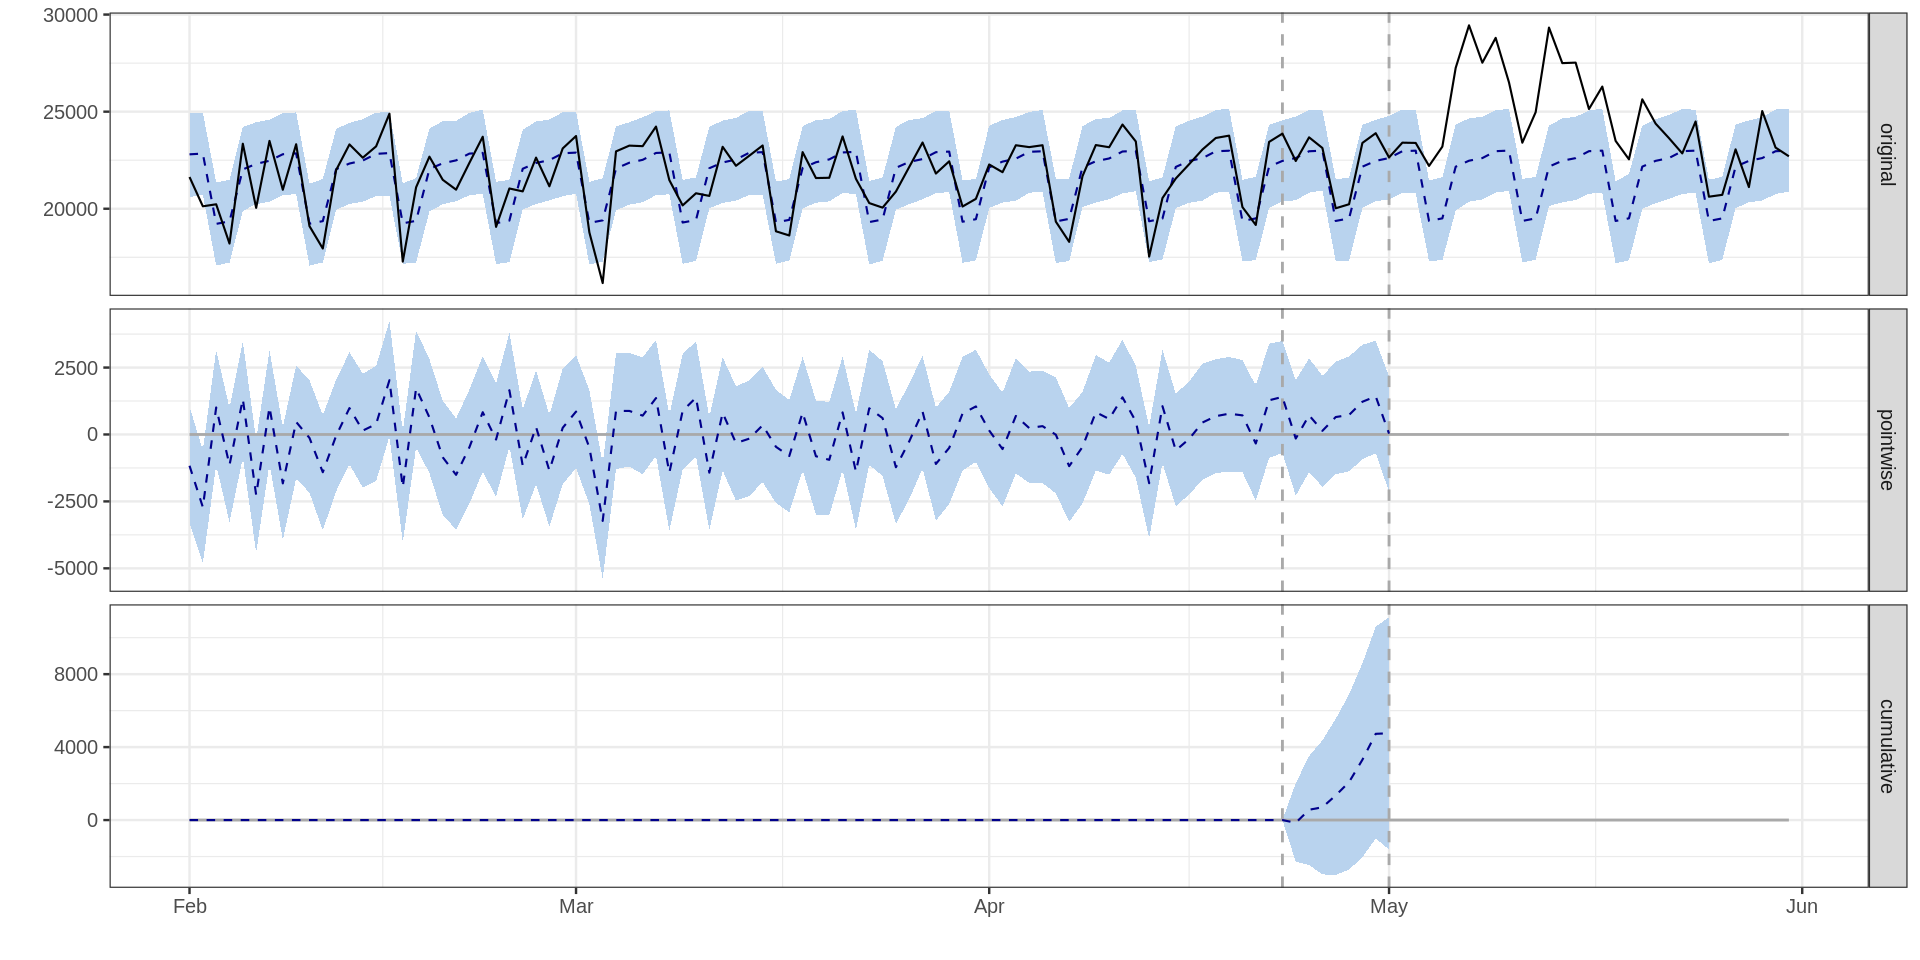

In [ ]:
#@title Changing the test window { vertical-output: true, display-mode: "form" }


 #@markdown How many days prior intervation?
priordays <- 7 # @param


new_pre_period_start <- pre_period_start
new_pre_period_end <- as.character(as.Date(pre_period_end)-priordays)

new_post_period_start <- as.character(as.Date(post_period_start)- priordays)
new_post_period_end <- post_period_start

new_pre.period <- as.Date(c(new_pre_period_start, new_pre_period_end))
new_post.period <- as.Date(c(new_post_period_start,new_post_period_end))

new_pre_dayscount <- as.numeric(difftime(new_pre_period_end, new_pre_period_start, units = "days"))
new_post_dayscount <- as.numeric(difftime(new_post_period_end, new_post_period_start, units = "days"))

listParam <-  as.list(strsplit(gsub(" ", "", Counterfactual_Series, fixed = TRUE), ",")[[1]])



# Print date interval and peer set series
cat(bold_text, "\n• NEW Pre Period date range", reset_text,
    "\n    ", as.character(new_pre_period_start), ", ", new_pre_period_end," (", new_pre_dayscount," days)", sep="");

cat(bold_text, "\n\n• NEW Post Period date range", reset_text,
    "\n    ", as.character(new_post_period_start), ", ", new_post_period_end," (", new_post_dayscount," days)", sep="");

cat(bold_text, "\n\n• Target Series", reset_text, "\n    ", as.character(Target), "\n" )
cat( bold_text, "\n•", length(listParam),"Peer Set Series", reset_text)
for (i in 1:length(listParam)) {
  cat("\n     ",i, ". ", listParam[[i]], sep="")
}



##########################
####    Data Prep     ####
##########################


# Change if the date column is not the number 1 from data frame
names(df)[1]  <- "DATE"

# Transform DATE from "Fator" to "Date"
   # Note: we use ymd() function because head(df) revealed that YMD is the date format in our df
df$DATE <- ymd(df$DATE)

# Cut df to contains only the used time window. This makes a better plot at the end
df_start <- which(grepl(new_pre_period_start,  df$DATE))
df_end <- which(grepl(post_period_end,  df$DATE))
df_cut <- df[  df_start:df_end, ]


###################################################
####    Setting Target and Peer Set series     ####
###################################################

# Define the Target Series
y <- as.ts( df_cut[[Target]] )

# Define the Control Series
df_final <- data.frame(y) #create dataframe

#Add control ts to the dataframe
for(i in 1:length(listParam)) {                                   # Head of for-loop
  df_final[ , ncol(df_final) + 1] <- as.ts(df_cut[listParam[[i]]])                  # Append new column
  colnames(df_final)[ncol(df_final)] <- listParam[[i]]  # Rename column name to actual ts name
}


# Add a time column for df_final
time.points <- seq.Date(as.Date(new_pre_period_start), by = 1, length.out = nrow(df_final))
df_final <- zoo(cbind(df_final), time.points)


##################################
####      Run CausalImpact    ####
##################################

# To guarantee that every repetition will have the exact same output
set.seed(42)

impact <- CausalImpact(df_final,
                       new_pre.period,
                       new_post.period,
                       model.args = list(niter = 5000, nseasons = 7))
# Notes:
# "niter" is 1000 by default. Higher values generally makes more accurate predictions, but the model takes longer to run.
# "nseason" is 1 by default and it is used when there is no apparent seasonality behavior. When using days, nseasons =7 is usually more appropriate.

# Define plot size
options(repr.plot.width=16, repr.plot.height=8)

# Plot impact graph
plot(impact)

# Show summary
summary_text <- capture.output(summary(impact))
summary_text <- head(summary_text, -2)  # Remove the last sentence
cat("\n\n",summary_text, sep = "\n")

#Only printing the p-value
p_value_vector = unname(sapply(impact[2], `[`, 15))
p_value = round(unname(sapply(p_value_vector, `[`, 1)),4)

red_text <- "\033[31m"
green_text <- "\033[32m"
reset_text <- "\033[0m"


if (as.numeric(p_value) < 0.05) {
 cat(red_text, "• When analysing", priordays,
    "before the intervention, we find a statistically significant lift (One-sided Post. tail-area prob. < 0.05).   \n This means that the target series do NOT meet the stability test crtieria. ✘ \n",reset_text)

}else
{
  cat(green_text, "• When analysing", priordays,
    "before the intervention, lift is NOT statistically significant (One-sided Post. tail-area prob. < 0.05). \n This means that the target series meets the stability test crtieria. ✔ \n",reset_text)
}

##- - - - - 3. Unaffectedness test

You shouldn't identify a statistically significant incremental impact when one of the control variables is treated as a response variable. The following cell will run each of the peer set series as a target and use the remaining series
as a new peer set.

Only run this test if you have at least 4 peer set series in total.

**Success for this test is not having a statistically significant impact**.

In [ ]:
#@title Unaffectedness test for each peer set  { vertical-output: true, display-mode: "form" }

if (length(listParam) < 3) {
  cat("ERROR: you need more than", length(listParam), "peer set to run that test.\n\n" )
  }


newPeerSet <- listParam

listDisap <- list()
listAppr <- list()

# Print date interval and peer set series
cat(bold_text, "\n• Pre Period date range", reset_text,
    "\n    ", as.character(pre_period_start), ", ", pre_period_end," (", pre_dayscount," days)", sep="");

cat(bold_text, "\n\n• Post Period date range", reset_text,
    "\n    ", as.character(post_period_start), ", ", post_period_end," (", post_dayscount," days)", sep="");


cat("\n\n\n--- Testing each of the", length(listParam)  , "covariates ---\n")


for (i in seq_along(newPeerSet)) {
  New_Target <- newPeerSet[i]
  current_list <- newPeerSet[-i]  # Exclude the current item
  cat(paste("\n\n• Target: ", New_Target, "\n• Peer Set:  "));
  cat(paste( current_list, collapse = ', '), "\n")


New_Target <- New_Target[[1]]

listParamPeer <-  current_list



##########################
####    Data Prep     ####
##########################


# Change if the date column is not the number 1 from data frame
names(df)[1]  <- "DATE"

# Transform DATE from "Fator" to "Date"
   # Note: we use ymd() function because head(df) revealed that YMD is the date format in our df
df$DATE <- ymd(df$DATE)

# Cut df to contains only the used time window. This makes a better plot at the end
df_start <- which(grepl(pre_period_start,  df$DATE))
df_end <- which(grepl(post_period_end,  df$DATE))
df_cut <- df[  df_start:df_end, ]


###################################################
####    Setting Target and Peer Set series     ####
###################################################

# Define the Target Series
y <- as.ts( df_cut[[New_Target]] )

# Define the Control Series
df_final <- data.frame(y) #create dataframe

#Add control ts to the dataframe
for(i in 1:length(listParamPeer)) {                 # Head of for-loop
  df_final[ , ncol(df_final) + 1] <- as.ts(df_cut[listParamPeer[[i]]])                  # Append new column
  colnames(df_final)[ncol(df_final)] <- listParamPeer[[i]]  # Rename column name to actual ts name
}


# Add a time column for df_final
time.points <- seq.Date(as.Date(pre_period_start), by = 1, length.out = nrow(df_final))
df_final <- zoo(cbind(df_final), time.points)


##################################
####      Run CausalImpact    ####
##################################


set.seed(42)

impact <- CausalImpact(df_final,
                       pre.period,
                       post.period,
                       model.args = list(niter = 1000, nseasons = 7))


# Print results
p_value_vector = unname(sapply(impact[2], `[`, 15))

p_value = round(unname(sapply(p_value_vector, `[`, 1)),3)
cat( ' Relative Effect: ', bold_text, round(unname(sapply(unname(sapply(impact[2], `[`, 10)), `[`, 1)),2)*100, "% ", reset_text,
  '  Posterior tail-area probability: ', bold_text, p_value, reset_text, "\n",
   sep="" )

if (as.numeric(p_value) < 0.05) {
 cat(red_text, bold_text, New_Target, reset_text, red_text, " peer set does have a stat sig lift (One-sided Post. tail-area prob. < 0.05) and do NOT meet he unaffectdeness test crtieria. ✘ \n", reset_text, sep="" )
listDisap <- c(listDisap, New_Target )

}else
{
  cat(green_text, bold_text, New_Target, reset_text, green_text, " peer set does NOT have a stat sig lift (One-sided Post. tail-area prob. < 0.05) and meets the unaffectdeness test crtieria. ✔ \n", reset_text, sep="")
listAppr <- c(listAppr, New_Target )
}
}

cat("\n\n--- Results ---\n")

cat("\n\n", bold_text,"• ",length(listAppr), " peerset series passed the test:\n", reset_text, sep="", paste(unlist(listAppr), collapse = ", ") , "\n\n")
cat( bold_text,"• ",length(listDisap), " peerset series failed the test:\n", reset_text, sep="", paste(unlist(listDisap), collapse = ", "), "\n\n" )



• Pre Period date range
    2024-02-01, 2024-04-30 (89 days)

• Post Period date range
    2024-05-01, 2024-05-31 (30 days)


--- Testing each of the 5 covariates ---


• Target:  CompetitorA 
• Peer Set:  CompetitorB, CompetitorC, CompetitorD, CompetitorE 
 Relative Effect: 0%   Posterior tail-area probability: 0.486
CompetitorA peer set does NOT have a stat sig lift (One-sided Post. tail-area prob. < 0.05) and meets the unaffectdeness test crtieria. ✔ 


• Target:  CompetitorB 
• Peer Set:  CompetitorA, CompetitorC, CompetitorD, CompetitorE 
 Relative Effect: 0%   Posterior tail-area probability: 0.481
CompetitorB peer set does NOT have a stat sig lift (One-sided Post. tail-area prob. < 0.05) and meets the unaffectdeness test crtieria. ✔ 


• Target:  CompetitorC 
• Peer Set:  CompetitorA, CompetitorB, CompetitorD, CompetitorE 
 Relative Effect: 0%   Posterior tail-area probability: 0.499
CompetitorC peer set does NOT have a stat sig lift (One-sided Post. tail-area prob. < 0.05) and

# **END**

Bonus:  Mass Causal Impact (WIP)

In [ ]:
dfx <-df

library(CausalImpact)
set.seed(42)

# List of items to subset by
item_list <- c("Alert", "Click", "Contact_Agent_Form_Submission", "Contact_Agent_Form_Submission_Valuation", "email_lead", "email_lead_instant_valuation", "Engagement", "Engagements", "Experiment", "file_download", "first_visit", "InstantValuation_ClientSide", "instant_valuation", "Lead", "Lead_ContactAgent", "Lead_Phone", "Lead_RP", "Maps_BranchPages", "Maps_BranchPages_AgentDescription", "Maps_BranchPages_localknowledge", "MortgageCalculator", "MyPlace_SearchPageClicks", "MyPlaceInteraction", "NewHomes", "NewHomes_CallAgent", "NewHomes_ContactDeveloper", "NewHomes_RelevantProperties", "page_view", "scroll", "Search", "session_start", "Social", "SRP_MP_Click", "SRP_MP_View", "user_engagement", "Valuation", "View", "view_search_results")

# Loop through each item in the list
for (item in item_list) {
  # Create subset for the current item
  subset_df <- dfx[, c("Date", item, "INDUSTRY")]

  # Rename the columns for consistency
  colnames(subset_df) <- c("Date", item, "INDUSTRY")

  # Print the first 3 rows of the subset
  cat("\n", item, " ")

##########################################################
##########################################################

# Filter the data for the relevant period
subset_df_filtered <- subset_df[
  subset_df$Date >= as.Date("2024-10-01") & subset_df$Date <= as.Date("2024-10-31"),
]

# Prepare the data for CausalImpact by removing the Date column
data <- subset_df_filtered[, -1]

# Define the pre- and post-intervention periods using row indices of the filtered data
pre_period <- c(1, 18)   # Rows corresponding to dates from "2024-10-01" to "2024-10-18"
post_period <- c(19, 31) # Rows corresponding to dates from "2024-10-19" to "2024-10-31"

# Run the CausalImpact analysis
impact <- CausalImpact(data, pre_period, post_period, model.args = list(niter = 5000, nseasons = 7))


# Print a summary of the results
relative_effect <- impact$summary[1, 10]
cat("|", (relative_effect)*100, "")

Posterior_prob <- impact$summary[1, 15]
cat("|", (1-Posterior_prob)*100, "")

##########################################################
##########################################################



}